In [16]:
import pandas as pd

wiki = pd.read_json('/data/ephemeral/home/sungeun/level2-mrc-nlp-13/code/data/wikipedia_documents.json',orient='index')
wiki_df = pd.DataFrame(wiki)
print(wiki_df.head())

                                                text corpus_source   url  \
0  이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...         위키피디아  TODO   
1  이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...         위키피디아  TODO   
2  현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...         위키피디아  TODO   
3  아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...         위키피디아  TODO   
4  저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...         위키피디아  TODO   

   domain    title  author  html  document_id  
0     NaN    나라 목록     NaN   NaN            0  
1     NaN    나라 목록     NaN   NaN            1  
2     NaN      백남준     NaN   NaN            2  
3     NaN  아오조라 문고     NaN   NaN            3  
4     NaN  아오조라 문고     NaN   NaN            4  


In [4]:
# train_dataset을 불러오고 싶은 경우
from datasets import load_from_disk
train_dataset = load_from_disk("/data/ephemeral/home/sungeun/level2-mrc-nlp-13/code/data/train_dataset")

print(train_dataset['train'][0]) # train
print(train_dataset['validation'][0]) # validation

test_dataset = load_from_disk("/data/ephemeral/home/sungeun/level2-mrc-nlp-13/code/data/test_dataset") 

print(test_dataset['validation'][0]) # test

{'title': '미국 상원', 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05', 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?', 'id': 'mrc-1-000067', 'answers': {'answer_start': [2

In [5]:
import pandas as pd

train = train_dataset['train']
val = train_dataset['validation']
test = test_dataset['validation']

train_df = pd.DataFrame(train)
val_df = pd.DataFrame(val)
test_df = pd.DataFrame(test)

In [6]:
train_df['context'][0]

'미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05'

In [7]:
L = train_df['context'][2].split()
print(L)
if '백성' in L:
    print(True) # L.index()
else:
    print(False)



['강희제는', '강화된', '황권으로', '거의', '황제', '중심의', '독단적으로', '나라를', '이끌어', '갔기에', '자칫', '전제', '독재의', '가능성이', '보일', '수도', '있었으나,', '스스로', '황권을', '조절하고', '정치의', '일부는', '재상들이나', '대신들과', '의논하였으며', '당시', '궁핍하게', '살고', '있는', '한족들의', '사정을', '잘', '알고', '있던', '한족', '대신들의', '의견을', '수용하여', '정책을', '실행하고', '선정을', '베풀었다.', '프랑스의', '예수회', '선교사', '부베는', '루이', '14세에게', '다음과', '같이', '보고하였다.', '\\n강희제는', '세상에서', '가장', '부유한', '군주입니다.', '그럼에도', '황제인', '그의', '생활용품들은', '사치스러움과', '화려함과는', '거리가', '멀다', '못해', '소박하기', '그지없습니다.', '역대', '제왕들', '가운데', '전례없는', '일입니다.\\n강희제', '스스로도', '자신이', '직접', '쓴', '《근검록》에서', '다음과', '같이', '쓰고', '있다\\n모든', '비용은', '백성들의', '피땀으로', '얻어진', '것이니', '주인된', '황제로서', '절제하고', '절제함은', '당연한', '것이', '아닌가\\n\\n이런', '강희제의', '인자한', '정치는', '한족이', '만주족의', '청나라를', '지지하게', '만드는', '데에', '크게', '일조하였다.', '1717년(강희', '56년)', '강희제는', '〈고별상유〉(告別上諭),', '즉', '마지막으로', '백성들에게', '바치는', '글을', '남겼는데', '강희제는', '“한', '가지', '일에', '부지런하지', '않으면', '온', '천하에', '근심을', '끼치고,', '한', '순간에', '부지런하지', '않으면', '천추만대에', '우환거리를', '남긴다.”라고'

In [12]:
baek_nam_jun_df = train_df["title"].str.contains("주기율표", na=False)
print(baek_nam_jun_df)

0       False
1       False
2       False
3       False
4       False
        ...  
3947    False
3948    False
3949    False
3950    False
3951    False
Name: title, Length: 3952, dtype: bool


In [4]:
val_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184


In [6]:
test_df.head()

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272


In [7]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

3952
240
600


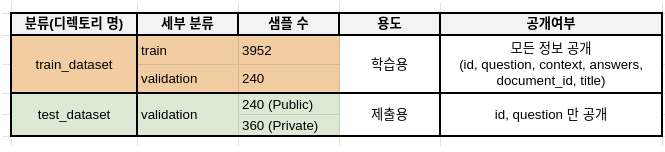

# 1. 결측치 확인

In [8]:
print(train_df.columns)
print(train_df.isnull().sum())

Index(['title', 'context', 'question', 'id', 'answers', 'document_id',
       '__index_level_0__'],
      dtype='object')
title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64


In [9]:
print(val_df.columns)
print(val_df.isnull().sum())

Index(['title', 'context', 'question', 'id', 'answers', 'document_id',
       '__index_level_0__'],
      dtype='object')
title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64


In [10]:
print(test_df.columns)
print(test_df.isnull().sum())

Index(['question', 'id'], dtype='object')
question    0
id          0
dtype: int64


# 2. 문장 길이 확인하기

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
train_context_lengths = train_df['context'].apply(len)
train_question_lengths = train_df['question'].apply(len)
train_answer_lengths = train_df['answers'].apply(lambda x: len(x['text'][0]))

In [20]:
print(min(train_context_lengths))
print(max(train_context_lengths))

512
2059


# 3. Baseline code Reasult 

In [48]:
import json

# 파일 경로 지정
file_path = '/data/ephemeral/home/sungeun/level2-mrc-nlp-13/code/outputs/train_dataset/predictions.json'

# JSON 파일 열기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 데이터 출력
print(json.dumps(data, indent=4, ensure_ascii=False))

{
    "mrc-0-003264": "서울지방법원 민사합의17부",
    "mrc-0-004762": "1868년",
    "mrc-1-001810": "나뭇잎",
    "mrc-1-000219": "화살",
    "mrc-1-000285": "수평적 관계",
    "mrc-0-005106": "쇼와 천황의 옥음방송(라디오 방송)",
    "mrc-0-002076": "코칭 스티치",
    "mrc-1-000414": "복잡한 감염병",
    "mrc-0-002875": "프랑스",
    "mrc-0-003828": "20세기 초",
    "mrc-0-002778": "\"5월의 왕\"",
    "mrc-0-003931": "프로젝트 2501",
    "mrc-0-002485": "테헤란",
    "mrc-0-004483": "역사교육과정개발추진위원회",
    "mrc-0-003032": "1967년 8월 16일",
    "mrc-1-000724": "1963년",
    "mrc-0-002138": "쿠빌라이",
    "mrc-0-003727": "〈중앙일보〉",
    "mrc-0-003115": "이이노야 성",
    "mrc-0-003088": "4순위",
    "mrc-0-005296": "뇌물",
    "mrc-1-001495": "준융합성 천연두",
    "mrc-0-005289": "데스탱 장군",
    "mrc-0-002240": "박트리아",
    "mrc-0-000248": "기와조각",
    "mrc-0-001846": "《국가》",
    "mrc-1-001653": "3월 19일",
    "mrc-0-000785": "브라질 포르투갈어",
    "mrc-0-001519": "릿지당",
    "mrc-0-002457": "강도왕 유건",
    "mrc-1-001479": "포드 극장",
    "mrc-0-001707": "항일운동참여",
    "mrc-0-002280": "『협동조합

In [21]:
import json

# 파일 경로 지정
file_path = '/data/ephemeral/home/sungeun/level2-mrc-nlp-13/code/outputs/test_dataset/predictions.json'

# JSON 파일 열기
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 데이터 출력
print(json.dumps(data, indent=4, ensure_ascii=False))

{
    "mrc-1-000653": "금성",
    "mrc-1-001113": "냉전",
    "mrc-0-002191": "빌헬름 미클라스",
    "mrc-0-003951": "뉴질랜드",
    "mrc-1-001272": "프랑스",
    "mrc-1-000993": "다리",
    "mrc-0-005021": "자본주의",
    "mrc-1-000163": "은어",
    "mrc-0-001283": "고종 8년(1871)",
    "mrc-0-004543": "도로면",
    "mrc-0-000439": "리처드 말킨",
    "mrc-0-002895": "칼라치 전방 약250km 지점",
    "mrc-0-000535": "리처드 J. 데일리",
    "mrc-1-001724": "노스햄프턴 교회",
    "mrc-0-000901": "아루",
    "mrc-0-001606": "중세 양식",
    "mrc-0-000266": "소크라테스",
    "mrc-0-001326": "'나의 플레이톡'",
    "mrc-0-000032": "루이스 곳샬크",
    "mrc-0-005215": "입석대(立石臺)",
    "mrc-0-005407": "Fritz Heider",
    "mrc-0-003683": "교육인적자원부",
    "mrc-0-003644": "이탈리아",
    "mrc-0-002835": "세지보살",
    "mrc-0-000049": "홀로덱",
    "mrc-1-001829": "화흡",
    "mrc-1-001662": "보신 전쟁",
    "mrc-0-001206": "2004년",
    "mrc-0-004007": "신시내티대학교",
    "mrc-1-000418": "228m",
    "mrc-0-003133": "신사용 양품 가게",
    "mrc-0-004646": "건늠선",
    "mrc-0-001058": "바이샬리에",
    "mrc-0-002361":